### How are In-demand Skills Trending for the top 3 popular Data Roles?
#### Methodology
1. Aggregate skills count monthly.
2. Calculate the likelihood of skills trend based on percentage of total jobs
3. plot the monthly skills trend figure.


In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [90]:
df_NG = df[(df['job_country'] == 'Nigeria') & (df['job_title_short'] ==  'Data Analyst')].copy()

In [91]:
df_NG['job_posted_month_no'] = df_NG['job_posted_date'].dt.month

In [92]:
df_NG_explode= df_NG.explode('job_skills')

In [93]:
df_NG_pivot = df_NG_explode.pivot_table(index= 'job_posted_month_no', columns= 'job_skills', aggfunc= 'size', fill_value= 0)
df_NG_pivot.loc['Total'] = df_NG_pivot.sum()
df_NG_pivot

job_skills,alteryx,angular,asp.net,assembly,aws,azure,bash,bigquery,c,c#,...,tableau,terminal,trello,typescript,unix,vb.net,vba,visual basic,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,1,0,...,10,1,1,1,0,0,1,0,1,6
2,0,0,0,0,0,2,1,0,3,0,...,15,0,0,0,0,0,0,0,0,8
3,0,0,1,0,3,1,0,1,1,1,...,4,0,0,0,0,0,0,2,0,1
4,0,0,0,0,2,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,2
5,0,0,1,0,3,0,0,0,0,1,...,5,0,0,0,1,1,0,0,0,3
6,1,0,0,0,1,2,0,0,1,0,...,6,0,0,0,0,0,0,0,0,3
7,0,0,1,0,1,0,0,1,1,2,...,16,0,0,0,0,0,0,0,0,7
8,0,0,0,0,1,0,0,1,0,0,...,6,0,0,0,0,0,0,0,0,3
9,0,0,0,0,1,1,0,0,3,0,...,6,0,0,0,0,0,0,0,0,7


In [94]:
df_NG_pivot = df_NG_pivot[df_NG_pivot.loc['Total'].sort_values(ascending=False).index]
df_NG_pivot = df_NG_pivot.drop('Total')

In [95]:
df_NG_pivot

job_skills,excel,sql,python,tableau,power bi,r,word,sas,spss,powerpoint,...,elasticsearch,gdpr,seaborn,kafka,angular,plotly,powershell,scala,scikit-learn,perl
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,20,10,14,10,12,9,6,6,5,5,...,0,0,1,1,0,1,1,0,1,0
2,13,13,9,15,9,10,8,2,1,3,...,0,0,0,0,0,0,0,0,0,0
3,9,9,7,4,3,6,1,0,2,0,...,0,1,0,0,0,0,0,0,0,0
4,9,6,6,3,3,6,2,0,3,1,...,0,0,0,0,0,0,0,0,0,0
5,10,12,6,5,3,4,3,8,5,0,...,0,0,0,0,0,0,0,1,0,0
6,11,8,5,6,4,6,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
7,21,25,20,16,9,10,7,6,3,3,...,0,0,0,0,0,0,0,0,0,0
8,7,9,6,6,6,3,3,2,1,2,...,1,0,0,0,0,0,0,0,0,1
9,17,10,3,6,7,4,7,6,4,1,...,0,0,0,0,0,0,0,0,0,0


### from count to percentage...

In [96]:
total_jobs = df_NG.groupby('job_posted_month_no').size()
total_jobs

job_posted_month_no
1     37
2     40
3     19
4     26
5     24
6     19
7     45
8     21
9     38
10    14
11    14
12     7
dtype: int64

In [97]:
DA_percent = df_NG_pivot.div(total_jobs, axis= 0)*100
DA_percent

job_skills,excel,sql,python,tableau,power bi,r,word,sas,spss,powerpoint,...,elasticsearch,gdpr,seaborn,kafka,angular,plotly,powershell,scala,scikit-learn,perl
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.054054,27.027027,37.837838,27.027027,32.432432,24.324324,16.216216,16.216216,13.513514,13.513514,...,0.000000,0.000000,2.702703,2.702703,0.000000,2.702703,2.702703,0.000000,2.702703,0.000000
2,32.500000,32.500000,22.500000,37.500000,22.500000,25.000000,20.000000,5.000000,2.500000,7.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,47.368421,47.368421,36.842105,21.052632,15.789474,31.578947,5.263158,0.000000,10.526316,0.000000,...,0.000000,5.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,34.615385,23.076923,23.076923,11.538462,11.538462,23.076923,7.692308,0.000000,11.538462,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,41.666667,50.000000,25.000000,20.833333,12.500000,16.666667,12.500000,33.333333,20.833333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.166667,0.000000,0.000000
6,57.894737,42.105263,26.315789,31.578947,21.052632,31.578947,15.789474,10.526316,5.263158,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,46.666667,55.555556,44.444444,35.555556,20.000000,22.222222,15.555556,13.333333,6.666667,6.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,33.333333,42.857143,28.571429,28.571429,28.571429,14.285714,14.285714,9.523810,4.761905,9.523810,...,4.761905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.761905
9,44.736842,26.315789,7.894737,15.789474,18.421053,10.526316,18.421053,15.789474,10.526316,2.631579,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [98]:
# changing month number to month name...
DA_percent= DA_percent.reset_index()
DA_percent['job_posted_month'] = DA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format ='%m').strftime('%b'))
DA_percent = DA_percent.set_index('job_posted_month')
DA_percent = DA_percent.drop(columns= 'job_posted_month_no')
DA_percent

job_skills,excel,sql,python,tableau,power bi,r,word,sas,spss,powerpoint,...,elasticsearch,gdpr,seaborn,kafka,angular,plotly,powershell,scala,scikit-learn,perl
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.054054,27.027027,37.837838,27.027027,32.432432,24.324324,16.216216,16.216216,13.513514,13.513514,...,0.000000,0.000000,2.702703,2.702703,0.000000,2.702703,2.702703,0.000000,2.702703,0.000000
Feb,32.500000,32.500000,22.500000,37.500000,22.500000,25.000000,20.000000,5.000000,2.500000,7.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,47.368421,47.368421,36.842105,21.052632,15.789474,31.578947,5.263158,0.000000,10.526316,0.000000,...,0.000000,5.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,34.615385,23.076923,23.076923,11.538462,11.538462,23.076923,7.692308,0.000000,11.538462,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,41.666667,50.000000,25.000000,20.833333,12.500000,16.666667,12.500000,33.333333,20.833333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.166667,0.000000,0.000000
Jun,57.894737,42.105263,26.315789,31.578947,21.052632,31.578947,15.789474,10.526316,5.263158,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,46.666667,55.555556,44.444444,35.555556,20.000000,22.222222,15.555556,13.333333,6.666667,6.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,33.333333,42.857143,28.571429,28.571429,28.571429,14.285714,14.285714,9.523810,4.761905,9.523810,...,4.761905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.761905
Sep,44.736842,26.315789,7.894737,15.789474,18.421053,10.526316,18.421053,15.789474,10.526316,2.631579,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\ekene\AppData\Local\Temp\ipykernel_17716\468953157.py:5: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(df_plot, palette= 'tab10', dashes= False, markers= 'o')


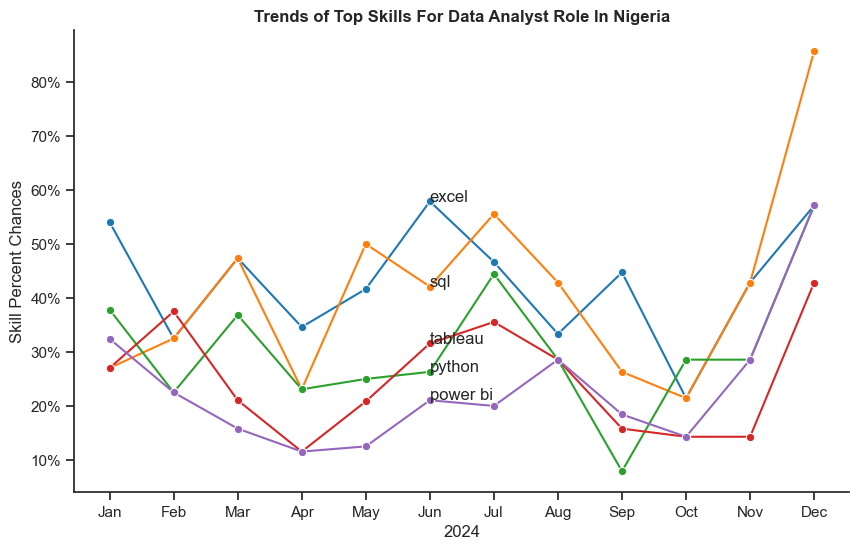

In [105]:
# plotting only the first five columns
plt.figure(figsize= (10,6))
sns.set_theme(style= 'ticks')
df_plot= DA_percent.iloc[:, :5]
sns.lineplot(df_plot, palette= 'tab10', dashes= False, markers= 'o')
sns.despine()

plt.legend().remove()
plt.title('Trends of Top Skills For Data Analyst Role In Nigeria', fontsize= 12, weight= 'bold')
plt.xlabel('2024')
plt.ylabel('Skill Percent Chances')

#to label the yaxis as percentage
from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax= 100))

# to add labels to each line
for i in range(5):
    plt.text(5, df_plot.iloc[5, i], DA_percent.columns[i])

plt.show()    